In [1]:
import numpy as np
import pandas as pd

import datetime

import matplotlib
from matplotlib import pyplot as plt

import os

basedir = os.getcwd()
scriptdir = os.path.join(basedir, 'script_versions')

os.chdir(scriptdir)
import ERDDAP_Access as erd
os.chdir(basedir)

In [2]:
def get_latest_time(loc_id):
    
    # Define the url of the ERDDAP
    # Note: use the http, not https site
    erddap_url = 'https://erddap.backyardbuoys.org/erddap/'

    # Define the dataset id, based on the location ID
    test_dataset = 'backyardbuoys_' + location_id

    # Define the constraints and variables to pull

    constraints = {
        "time=":"max(time)"
    }

    variables = [
        "time"
    ]

    # Get the data
    buoy_data = erd.get_erddap_data(erddap_url, test_dataset, 
                                    data_protocol='tabledap', 
                                    variables=variables, constraints=constraints)
    
    maxtime = datetime.datetime.strptime(buoy_data.loc[0,'time (UTC)'], '%Y-%m-%dT%H:%M:%SZ')
    
    return maxtime

In [3]:
# Identify the dataset
location_id = 'majuro'

In [4]:
# Define the url of the ERDDAP
# Note: use the http, not https site
erddap_url = 'https://erddap.backyardbuoys.org/erddap/'

# Define the dataset id, based on the location ID
test_dataset = 'backyardbuoys_' + location_id

# Most recent date of data:
latest_time = min([get_latest_time(location_id),
                   datetime.datetime.now().replace(hour=0,minute=0,second=0,microsecond=0)])

# Days of data to pull
lookback_days = 90 


# Define the constraints
constraints = {
    "time>=": (latest_time-datetime.timedelta(days=lookback_days)).strftime('%Y-%m-%dT%H:%M:%SZ')
}

# Define the variables to pull
variables = [
    "time",
    "sea_surface_wave_significant_height",
    "sea_surface_wave_mean_period",
    "sea_surface_wave_from_direction",
    "sea_surface_wave_significant_height_qc_agg",
    "sea_surface_wave_mean_period_qc_agg",
    "sea_surface_wave_from_direction_qc_agg"
]

# Get the data
buoy_data = erd.get_erddap_data(erddap_url, test_dataset, 
                                data_protocol='tabledap', 
                                variables=variables, constraints=constraints)

In [5]:
buoy_data

,time (UTC),sea_surface_wave_significant_height (m),sea_surface_wave_mean_period (s),sea_surface_wave_from_direction (degree),sea_surface_wave_significant_height_qc_agg (1),sea_surface_wave_mean_period_qc_agg (1),sea_surface_wave_from_direction_qc_agg (1)
0,2024-12-12T00:21:59Z,0.67,5.06,296.976,1,1,1
1,2024-12-12T00:51:59Z,0.61,4.62,0.647,1,1,1
2,2024-12-12T01:21:59Z,0.59,5.40,330.317,1,1,1
3,2024-12-12T01:51:59Z,0.52,5.62,320.503,1,1,1
4,2024-12-12T02:21:59Z,0.53,6.38,307.247,1,1,1
...,...,...,...,...,...,...,...
3798,2025-03-12T20:56:19Z,0.75,4.52,14.657,1,1,1
3799,2025-03-12T21:26:19Z,0.75,4.22,22.577,1,1,1
3800,2025-03-12T21:56:19Z,0.78,4.32,19.904,1,1,1
3801,2025-03-12T22:26:19Z,0.82,4.58,348.977,1,1,1


In [6]:
buoydates = np.array([pd.Timestamp(ii).to_pydatetime() 
                      for ii in buoy_data['time (UTC)']])

Text(0.5, 1.0, 'Significant Wave Height at "majuro"')

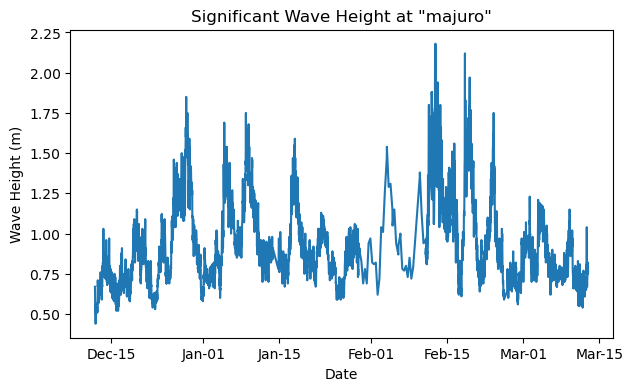

In [7]:
fig, ax = plt.subplots(figsize=(7,4))

if any(buoy_data['sea_surface_wave_significant_height_qc_agg (1)'] <= 3):
    goodinds = np.where(buoy_data['sea_surface_wave_significant_height_qc_agg (1)'] <= 3)[0]
else:
    goodinds = np.array([])
    
ax.plot(buoydates[goodinds], buoy_data['sea_surface_wave_significant_height (m)'][goodinds])

locator = matplotlib.dates.AutoDateLocator(minticks=4, maxticks=10)
formatter = matplotlib.dates.DateFormatter('%b-%d')

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel('Date')
ax.set_ylabel('Wave Height (m)')
ax.set_title('Significant Wave Height at "' + location_id + '"')

Text(0.5, 1.0, 'Wave Direction (degrees) / Wave Period (s)\n(angle) / (radius)')

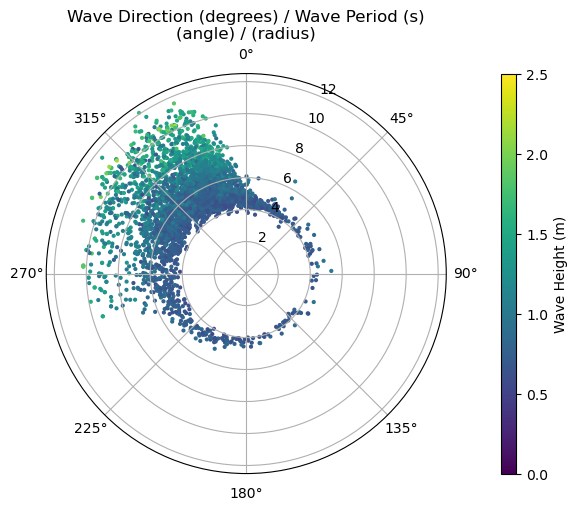

In [8]:
fig, ax = plt.subplots(figsize=(6,5), subplot_kw={'projection': 'polar'})

maxheight = np.ceil(2*np.nanmax(buoy_data['sea_surface_wave_significant_height (m)']))/2

if any(buoy_data['sea_surface_wave_significant_height_qc_agg (1)'] <= 3):
    goodinds = np.where(buoy_data['sea_surface_wave_significant_height_qc_agg (1)'] <= 3)[0]
else:
    goodinds = np.array([])

cb = ax.scatter(np.array([np.radians(ii) for ii in 
                          buoy_data['sea_surface_wave_from_direction (degree)']])[goodinds], 
                buoy_data['sea_surface_wave_mean_period (s)'][goodinds],
                s=4, c=buoy_data['sea_surface_wave_significant_height (m)'][goodinds],
                vmin=0, vmax=maxheight)

ax.set_theta_direction('clockwise')
ax.set_theta_zero_location(loc='N')

xmin = 0.1
ymin = 0.1
width = 0.8
height = 0.8
cbar_width = 0.025
cbar_offset = 0.025

ax.set_position([xmin, ymin, width, height])
    
cbar_ax= fig.add_axes([xmin+width+cbar_offset, ymin, cbar_width, height])
cbar = fig.colorbar(cb, cax=cbar_ax, ax=ax)
cbar.ax.set_ylabel('Wave Height (m)')
ax.set_title('Wave Direction (degrees) / Wave Period (s)\n(angle) / (radius)')